In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
dataset = pd.read_csv('../../../DataScience/DataSet/Iris.csv')

In [4]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

(150, 5)

In [5]:
dataset.head

<bound method NDFrame.head of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [6]:
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
dataset.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [8]:
# Dividing data into features and labels
feature_columns = ['sepal.length', 'sepal.width', 'petal.length','petal.width']
X = dataset[feature_columns].values
y = dataset['variety'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [9]:
type(y)

numpy.ndarray

In [10]:
y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [11]:
# Label encoding
# As we can see labels are categorical. KNeighborsClassifier does not accept string labels. 
# We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, 
# Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

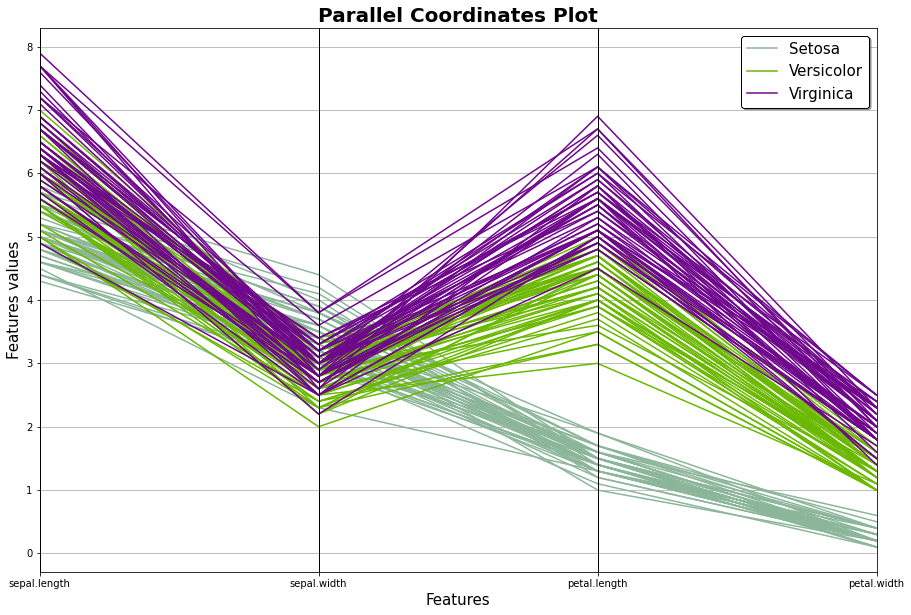

In [14]:
# Parallel Coordinates
"""
Parallel coordinates is a plotting technique for plotting multivariate data. 
It allows one to see clusters in data and to estimate other statistics visually. 
Using parallel coordinates points are represented as connected line segments. 
Each vertical line represents one attribute. One set of connected line segments represents one data point. 
Points that tend to cluster will appear closer together.
"""
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset, "variety")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

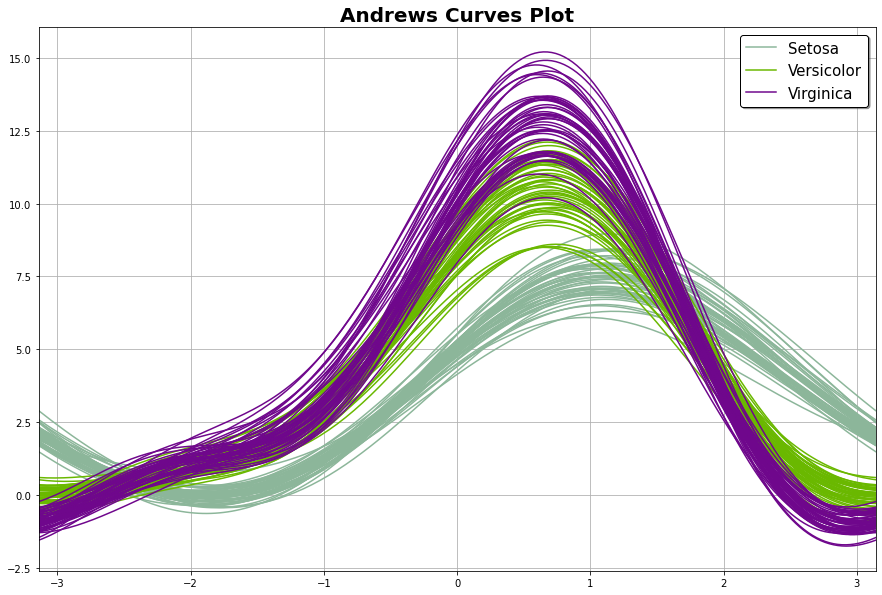

In [15]:
# Andrews Curves
"""
Andrews curves allow one to plot multivariate data as a large number of curves 
that are created using the attributes of samples as coefficients for Fourier series. 
By coloring these curves differently for each class it is possible to visualize data 
clustering. Curves belonging to samples of the same class will usually be closer 
together and form larger structures.
"""
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset, "variety")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 432x288 with 0 Axes>

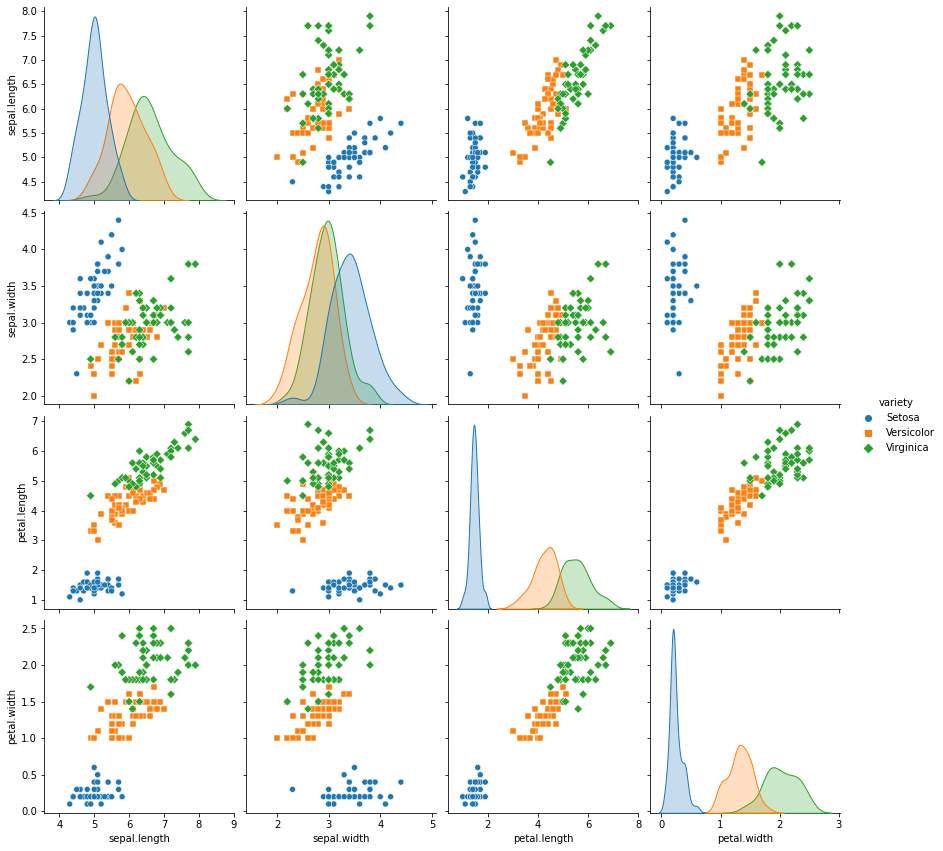

In [16]:
# Pairplot
"""
Pairwise is useful when you want to visualize the distribution of a variable or the relationship 
between multiple variables separately within subsets of your dataset.
"""
plt.figure()
sns.pairplot(dataset, hue = "variety", height=3, markers=["o", "s", "D"])
plt.show()

<Figure size 432x288 with 0 Axes>

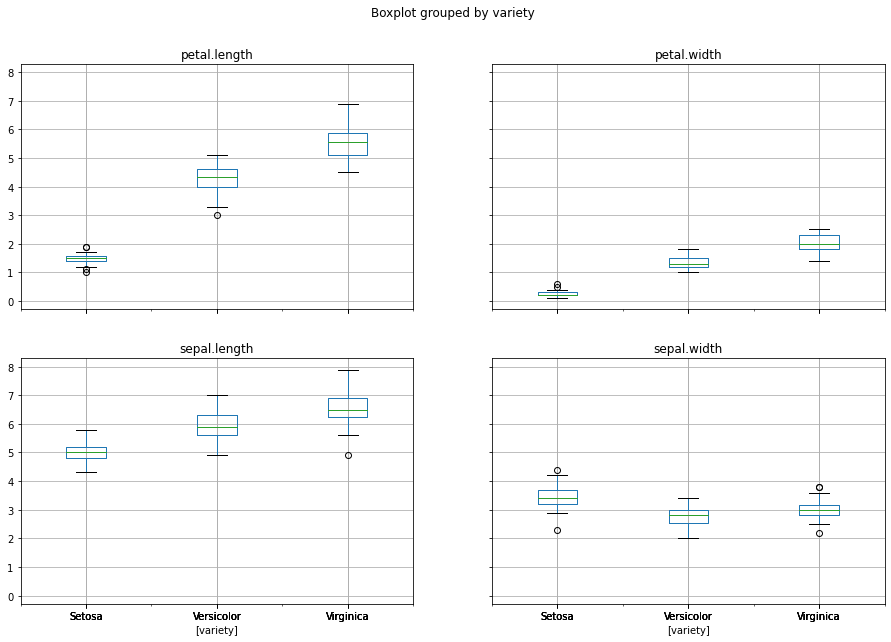

In [17]:
# Boxplots
"""
It is based on 5-number summary
"""
plt.figure()
dataset.boxplot(by="variety", figsize=(15, 10))
plt.show()

[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

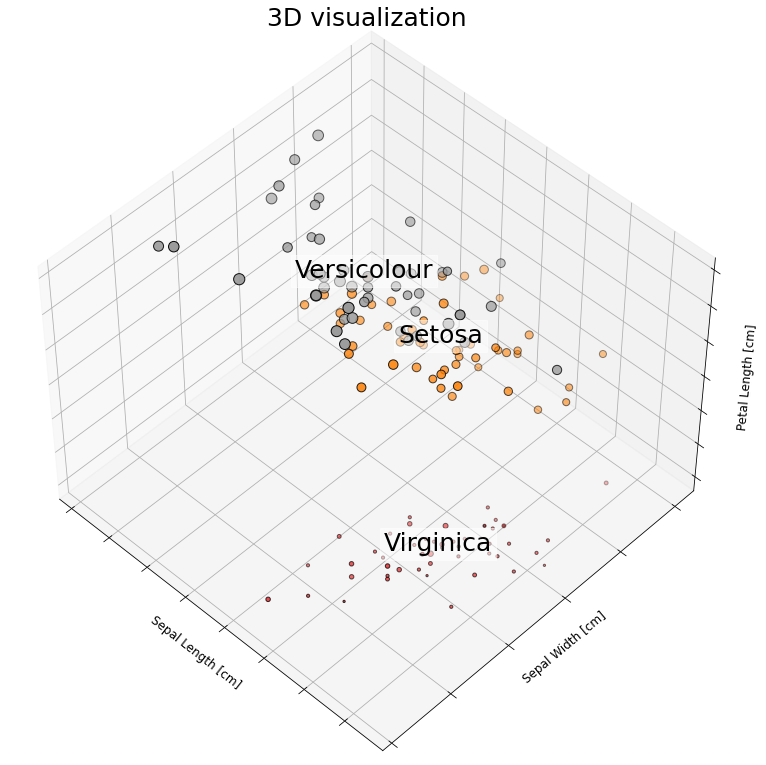

In [18]:
# 3D visualization
"""
You can also try to visualize high-dimensional datasets in 3D using color, shape, size a
nd other properties of 3D and 2D objects. 
In this plot I used marks sizes to visualize fourth dimenssion which is Petal Width [cm].
"""
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(15, 10))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=25)
ax.set_xlabel("Sepal Length [cm]", fontsize=12)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=12)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=12)
ax.w_zaxis.set_ticklabels([])